In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="HDA",
                                           user = "postgres",
                                           password = "tasin805",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection


In [6]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find division wise Haemoglobin (HB%) tests in 2019.

In [23]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT g.division,count( ts.test_name) as total_tests " \
              "FROM star_schema.fact_sales f " \
              "JOIN star_schema.dim_test ts on ts.test_key=f.test_key " \
              "JOIN star_schema.dim_time t on t.time_key=f.time_key " \
              "JOIN star_schema.dim_geography g on g.geo_key=f.geo_key " \
                "WHERE t.year='2019'and ts.test_name='Haemoglobin (HB%)'" \
                "GROUP BY CUBE(g.division) " 
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, 464),
 ('RAJSHAHI', 23),
 ('DHAKA', 311),
 ('CHITTAGONG', 47),
 ('BARISAL', 23),
 ('KHULNA', 15),
 ('RANGPUR', 25),
 ('SYLHET', 20)]

In [24]:
df_q1 = pd.DataFrame(list(records), columns=['division', 'total_tests'])
df_q1

,division,total_tests
0,None,464
1,RAJSHAHI,23
2,DHAKA,311
3,CHITTAGONG,47
4,BARISAL,23
5,KHULNA,15
6,RANGPUR,25
7,SYLHET,20


In [25]:
df_q1=df_q1.dropna()
df_q1

,division,total_tests
1,RAJSHAHI,23
2,DHAKA,311
3,CHITTAGONG,47
4,BARISAL,23
5,KHULNA,15
6,RANGPUR,25
7,SYLHET,20


<Axes: ylabel='total_tests'>

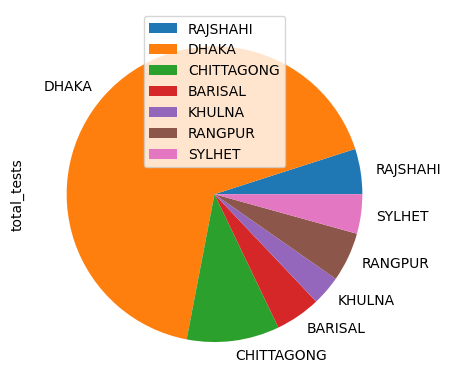

In [26]:
df_q1=df_q1.set_index(['division'])
df_q1.plot.pie(y='total_tests')

# Q2: Find 25 districts with highest number of blood tests in 2020. 

In [57]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT g.district,count( ts.specimen) as no_of_blood_tests " \
              "FROM star_schema.fact_sales f " \
              "JOIN star_schema.dim_test ts on ts.test_key=f.test_key " \
              "JOIN star_schema.dim_time t on t.time_key=f.time_key " \
              "JOIN star_schema.dim_geography g on g.geo_key=f.geo_key " \
                "WHERE t.year='2020'and ts.specimen='BLOOD'" \
                "GROUP BY CUBE(g.district) " \
                "ORDER BY count( ts.specimen) desc "
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, 12442),
 ('DHAKA', 6106),
 ('CHITTAGONG', 305),
 ('DINAJPUR', 217),
 ('JAMALPUR', 209),
 ('RAJSHAHI', 197),
 ('BANDARBAN', 190),
 ('SUNAMGANJ', 186),
 ('KISHOREGONJ', 181),
 ('COMILLA', 170),
 ('PATUAKHALI', 169),
 ('TANGAIL', 156),
 ('NETRAKONA', 154),
 ('SYLHET', 140),
 ('KHULNA', 134),
 ("COX'S BAZAR", 129),
 ('BRAHMANBARIA', 128),
 ('BHOLA', 127),
 ('GAIBANDHA', 127),
 ('MANIKGANJ', 123),
 ('RANGAMATI', 123),
 ('NARAYANGANJ', 119),
 ('HABIGANJ', 114),
 ('CHANDPUR', 113),
 ('BAGERHAT', 111),
 ('BARISAL', 105),
 ('FARIDPUR', 102),
 ('NOAKHALI', 101),
 ('JESSORE', 100),
 ('NAOGAON', 100),
 ('MUNSHIGANJ', 91),
 ('BOGRA', 90),
 ('SATKHIRA', 89),
 ('PIROJPUR', 87),
 ('NARAIL', 85),
 ('CHAPAI NABABGANJ', 84),
 ('GOPALGANJ', 83),
 ('MADARIPUR', 83),
 ('BARGUNA', 81),
 ('MYMENSINGH', 80),
 ('NILPHAMARI', 78),
 ('KURIGRAM', 71),
 ('RANGPUR', 71),
 ('MAULVIBAZAR', 70),
 ('SIRAJGANJ', 69),
 ('KHAGRACHHARI', 68),
 ('NATORE', 67),
 ('THAKURGAON', 65),
 ('PABNA', 64),
 ('KUSHTIA', 64),
 (

In [58]:
df_q2=pd.DataFrame(list(records), columns=['district', 'total_blood_tests'])
df_q2

,district,total_blood_tests
0,None,12442
1,DHAKA,6106
2,CHITTAGONG,305
3,DINAJPUR,217
4,JAMALPUR,209
...,...,...
60,SHERPUR,34
61,LALMONIRHAT,28
62,JHALOKATI,21
63,MAGURA,19


In [59]:
df_q2=df_q2.dropna()
df_q2


,district,total_blood_tests
1,DHAKA,6106
2,CHITTAGONG,305
3,DINAJPUR,217
4,JAMALPUR,209
5,RAJSHAHI,197
...,...,...
60,SHERPUR,34
61,LALMONIRHAT,28
62,JHALOKATI,21
63,MAGURA,19


In [60]:
df_q2=df_q2.head(25)
df_q2

,district,total_blood_tests
1,DHAKA,6106
2,CHITTAGONG,305
3,DINAJPUR,217
4,JAMALPUR,209
5,RAJSHAHI,197
6,BANDARBAN,190
7,SUNAMGANJ,186
8,KISHOREGONJ,181
9,COMILLA,170
10,PATUAKHALI,169


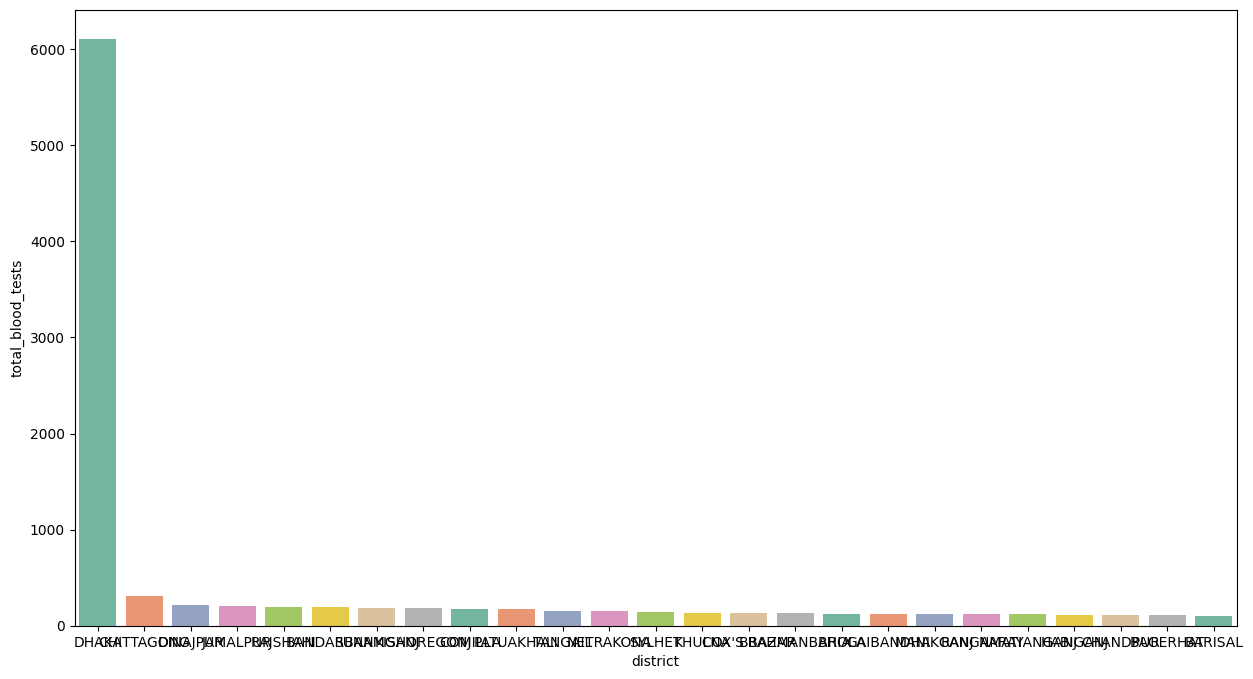

In [61]:
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plots=sns.barplot(x=df_q2['district'], y =df_q2['total_blood_tests'],palette="Set2" )

# Q3: Find the top 10 labs in Dhaka division with the highest sales price over the year 2019 and 2020.

In [65]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT l.lab_name,sum(f.sales_price) as total_sales_price " \
              "FROM star_schema.fact_sales f " \
              "JOIN star_schema.dim_time t on t.time_key=f.time_key " \
              "JOIN star_schema.dim_geography g on g.geo_key=f.geo_key " \
              "JOIN star_schema.dim_lab l on l.lab_key=f.lab_key " \
                "WHERE (t.year='2019' or t.year='2020')and g.division='DHAKA'" \
                "GROUP BY CUBE(l.lab_name) " \
                "ORDER BY count( l.lab_name) desc "
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, Decimal('51132030')),
 ('Biochemistry', Decimal('20465900')),
 ('Immunology', Decimal('15988680')),
 ('Haematology', Decimal('3877580')),
 ('Clinical Pathology', Decimal('1268030')),
 ('Serology', Decimal('2204050')),
 ('Microbiology', Decimal('3533330')),
 ('BLOOD TRANSFUSION', Decimal('3049760')),
 ('HISTO-PATHOLOGY', Decimal('264740')),
 ('CYTO-PATHOLOGY', Decimal('142160')),
 ('PCR LAB', Decimal('337800'))]

In [71]:
df_q3=pd.DataFrame(list(records), columns=['lab', 'total_sales_price'])

In [72]:
df_q3=df_q3.dropna()
df_q3=df_q3.head(10)
df_q3

,lab,total_sales_price
1,Biochemistry,20465900
2,Immunology,15988680
3,Haematology,3877580
4,Clinical Pathology,1268030
5,Serology,2204050
6,Microbiology,3533330
7,BLOOD TRANSFUSION,3049760
8,HISTO-PATHOLOGY,264740
9,CYTO-PATHOLOGY,142160
10,PCR LAB,337800


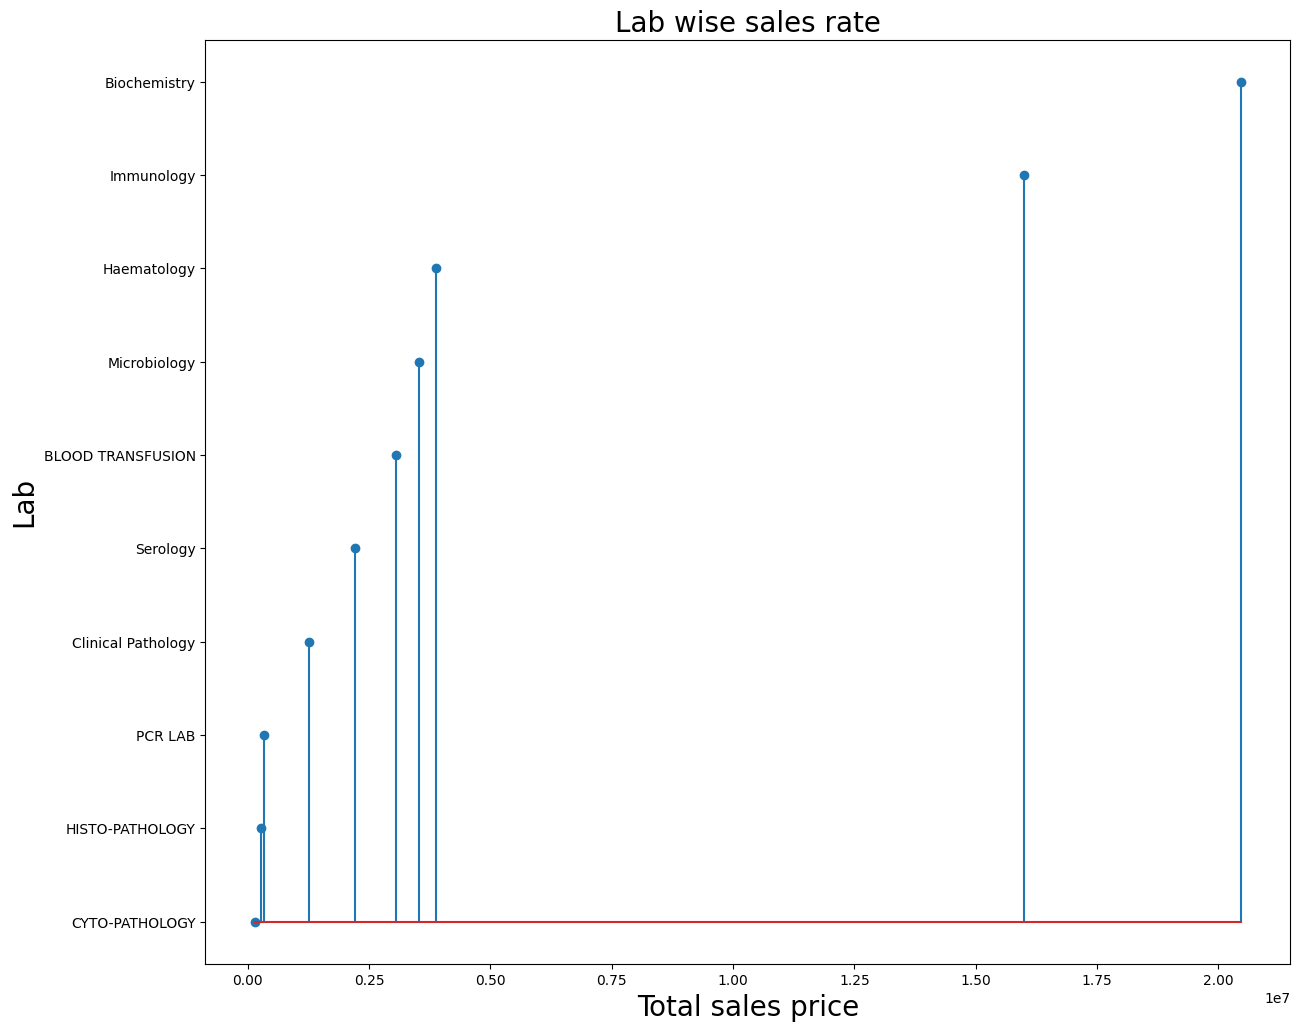

In [73]:
plt.figure(figsize= (14,12))
plt.title('Lab wise sales rate', fontsize=20)
plt.ylabel('Lab',fontsize=20)
plt.xlabel('Total sales price',fontsize=20)
df_q3.sort_values(by=["total_sales_price"], inplace=True)
plt.stem(df_q3['total_sales_price'],df_q3['lab'])
plt.show()

# Q4: Find district wise total number of tests monthly in Rajshahi in 2019.

In [79]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT g.district,t.month, count(ts.test_key) as total_tests " \
              "FROM star_schema.fact_sales f " \
              "JOIN star_schema.dim_time t on t.time_key=f.time_key " \
              "JOIN star_schema.dim_test ts on ts.test_key=f.test_key " \
              "JOIN star_schema.dim_geography g on g.geo_key=f.geo_key " \
                "WHERE t.year='2019' and g.division='RAJSHAHI'" \
                "GROUP BY CUBE( g.district,t.month) " \
                
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, None, 4507),
 ('NATORE', 4, 28),
 ('NAOGAON', 6, 32),
 ('BOGRA', 12, 38),
 ('RAJSHAHI', 8, 89),
 ('PABNA', 8, 73),
 ('SIRAJGANJ', 4, 51),
 ('SIRAJGANJ', 6, 47),
 ('NATORE', 3, 7),
 ('NAOGAON', 9, 79),
 ('NATORE', 2, 24),
 ('CHAPAI NABABGANJ', 6, 11),
 ('NAOGAON', 2, 30),
 ('JOYPURHAT', 3, 40),
 ('RAJSHAHI', 6, 40),
 ('SIRAJGANJ', 3, 35),
 ('NAOGAON', 8, 63),
 ('PABNA', 2, 114),
 ('PABNA', 12, 33),
 ('PABNA', 3, 89),
 ('RAJSHAHI', 1, 20),
 ('JOYPURHAT', 5, 11),
 ('NAOGAON', 5, 50),
 ('JOYPURHAT', 2, 31),
 ('CHAPAI NABABGANJ', 4, 9),
 ('CHAPAI NABABGANJ', 2, 40),
 ('NAOGAON', 3, 59),
 ('NATORE', 11, 29),
 ('NAOGAON', 11, 68),
 ('NATORE', 5, 19),
 ('SIRAJGANJ', 7, 65),
 ('PABNA', 9, 61),
 ('BOGRA', 11, 118),
 ('RAJSHAHI', 12, 107),
 ('PABNA', 4, 65),
 ('NATORE', 8, 52),
 ('NATORE', 7, 80),
 ('JOYPURHAT', 12, 2),
 ('PABNA', 1, 50),
 ('CHAPAI NABABGANJ', 5, 20),
 ('SIRAJGANJ', 10, 83),
 ('BOGRA', 1, 52),
 ('RAJSHAHI', 3, 91),
 ('NATORE', 9, 52),
 ('NAOGAON', 4, 48),
 ('BOGRA', 5, 25

In [80]:
df_q4=pd.DataFrame(list(records), columns=['district','month', 'total_tests'])
df_q4

,district,month,total_tests
0,None,NaN,4507
1,NATORE,4.0,28
2,NAOGAON,6.0,32
3,BOGRA,12.0,38
4,RAJSHAHI,8.0,89
...,...,...,...
112,None,1.0,258
113,None,5.0,258
114,None,4.0,402
115,None,2.0,391


In [81]:
df_q4=df_q4.dropna()
df_q4

,district,month,total_tests
1,NATORE,4.0,28
2,NAOGAON,6.0,32
3,BOGRA,12.0,38
4,RAJSHAHI,8.0,89
5,PABNA,8.0,73
...,...,...,...
92,BOGRA,9.0,50
93,NATORE,12.0,12
94,SIRAJGANJ,5.0,24
95,PABNA,10.0,33


<Axes: xlabel='month', ylabel='total_tests'>

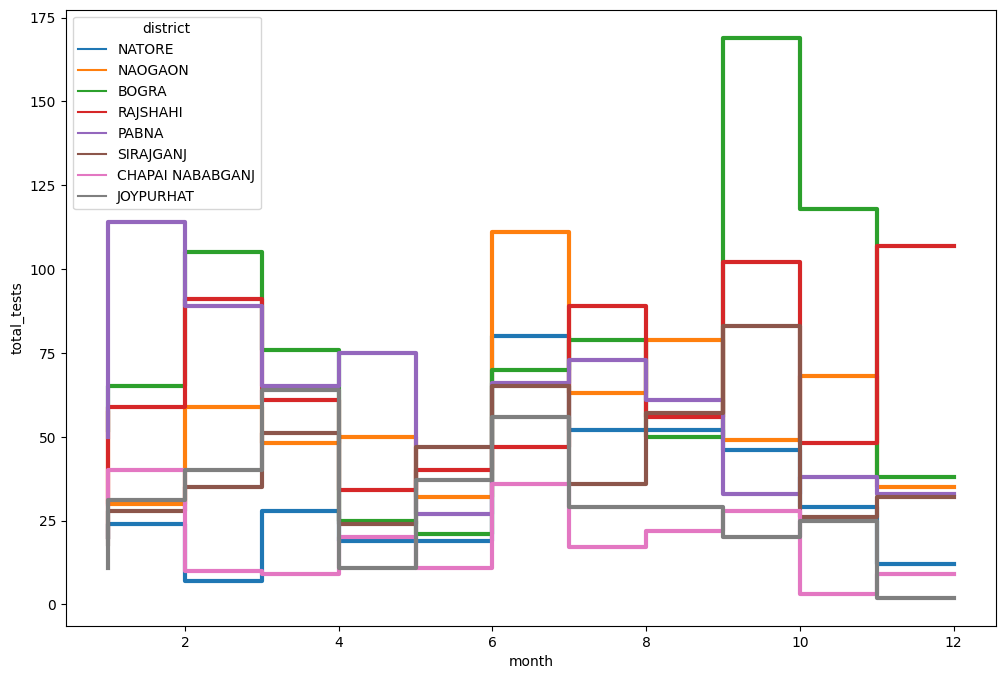

In [82]:
a_dims = (12, 8)
fig, ax = plt.subplots(figsize=a_dims)
sns.lineplot(x='month', y='total_tests', data=df_q4, drawstyle='steps-pre', hue='district', linewidth=3, ax=ax)


# Q5: Find season wise sales price in 2020.

In [115]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.quarter ,sum(f.sales_price) as sales_price  " \
              "FROM star_schema.fact_sales f " \
              "JOIN star_schema.dim_time t on t.time_key=f.time_key " \
              "JOIN star_schema.dim_geography g on g.geo_key=f.geo_key " \
                "WHERE t.year='2020'" \
                "GROUP BY CUBE( t.quarter) " \
                
                
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[(None, Decimal('17086680')),
 ('Q3', Decimal('12820')),
 ('Q4', Decimal('8960')),
 ('Q2', Decimal('3900780')),
 ('Q1', Decimal('13164120'))]

In [116]:
df_q5=pd.DataFrame(list(records), columns=['Season','sales_price'])
df_q5

,Season,sales_price
0,None,17086680
1,Q3,12820
2,Q4,8960
3,Q2,3900780
4,Q1,13164120


In [117]:
df_q5=df_q5.dropna()
df_q5

,Season,sales_price
1,Q3,12820
2,Q4,8960
3,Q2,3900780
4,Q1,13164120


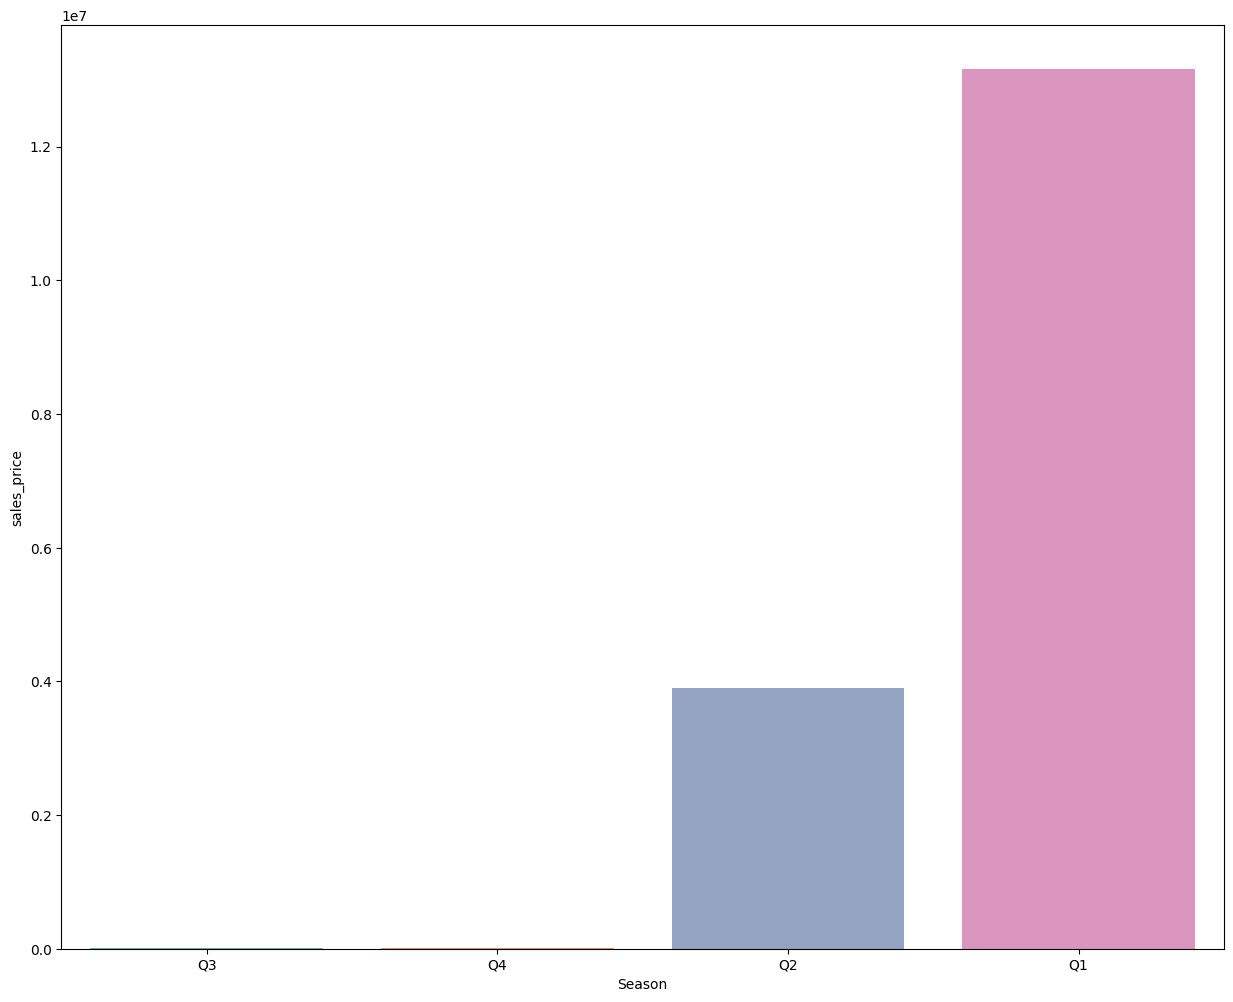

In [120]:
f=plt.figure()
f.set_figwidth(15)
f.set_figheight(12)
plots=sns.barplot(x=df_q5['Season'], y =df_q5['sales_price'],palette="Set2" )